In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import display_utils as dp

In [2]:
def system_sensitivity_plot(K):
    # System Sensitivity plot
    num = [1, 1, 0]
    den = [1, 12, K]
    w = np.logspace(-1, 3, 200)
    s = w * 1j

    n = s**2 + s
    d = s**2 + 12*s + K
    S = n / d

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.plot(S.real, S.imag)
    ax1.set_title(f'System Sensitivity to Plant Variations (K={K})')
    ax1.set_xlabel('Real Part')
    ax1.set_ylabel('Imaginary Part')
    ax1.grid(True)

    ax2.loglog(w, np.abs(S))
    ax2.set_xlabel('ω (rad/sec)')
    ax2.set_ylabel('|S|')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

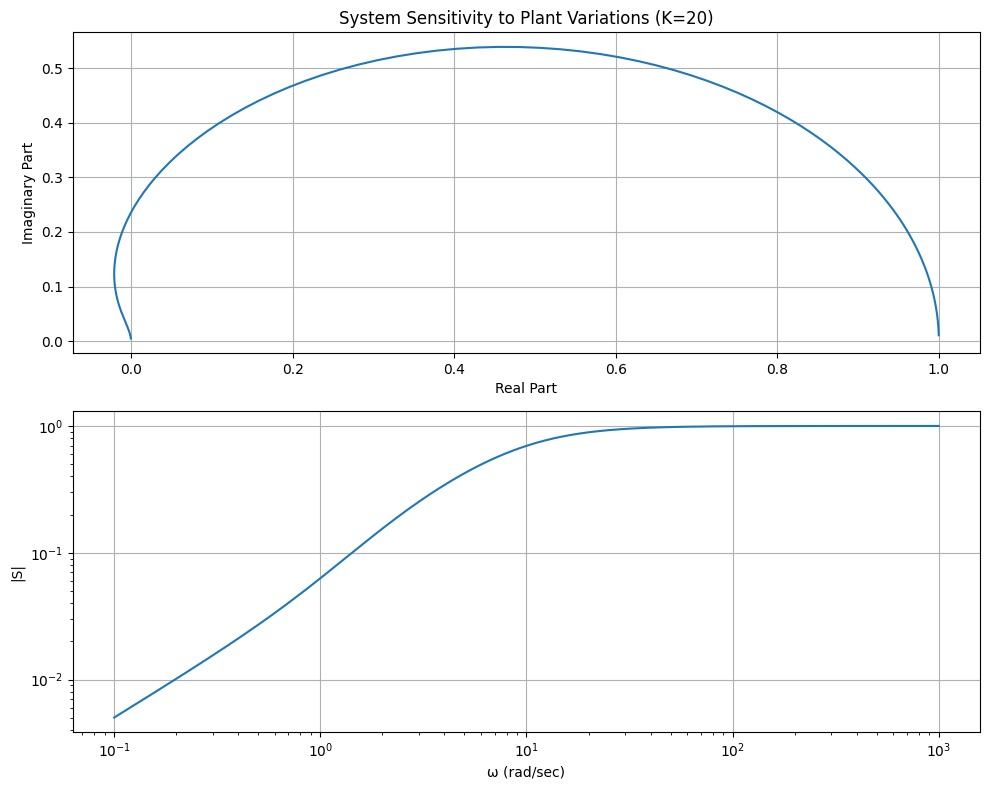

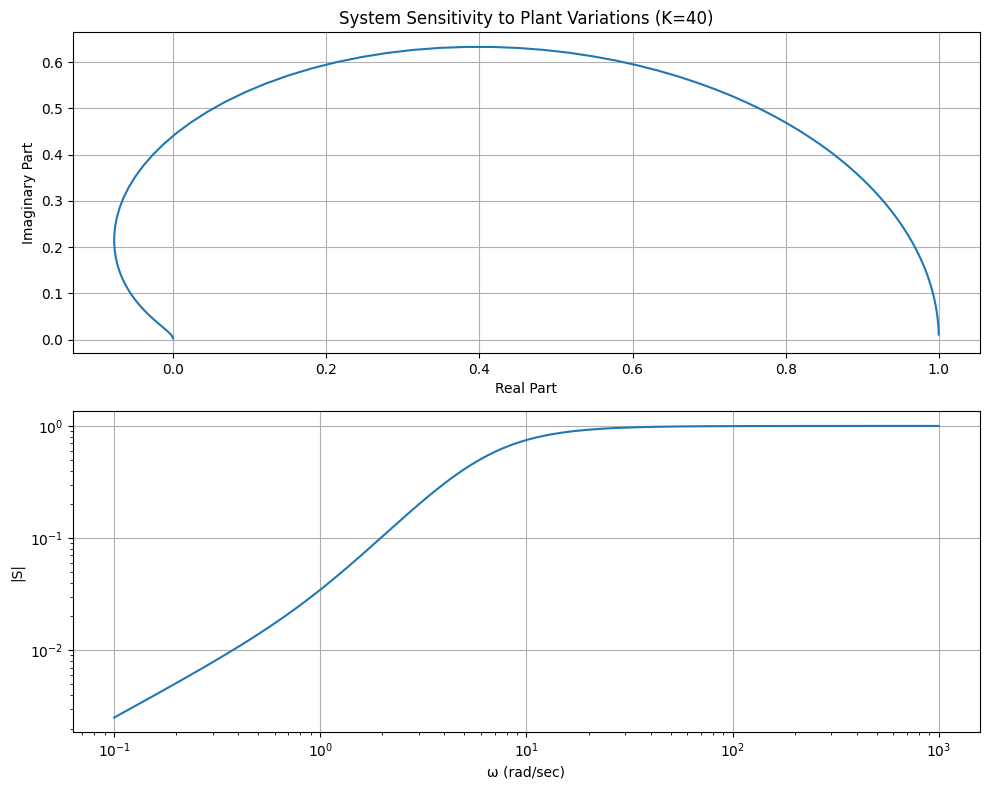

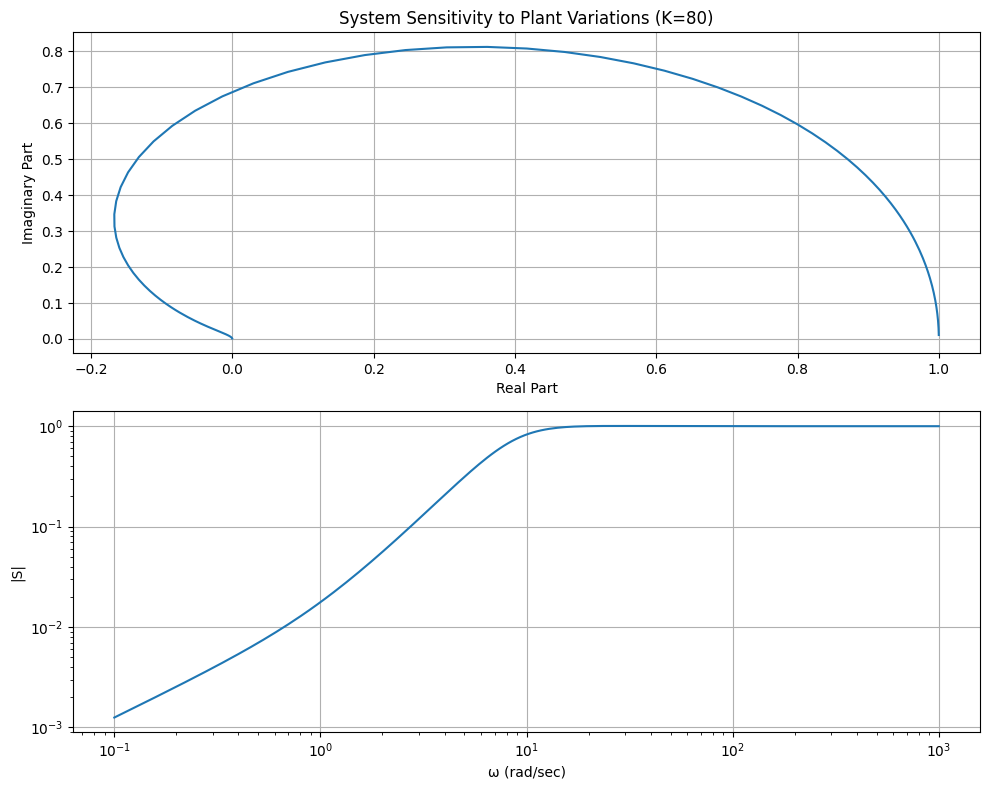

In [3]:
system_sensitivity_plot(20)
system_sensitivity_plot(40)
system_sensitivity_plot(80)


In [4]:
def closed_loop_step_response(Ka):
    sysf = ct.tf([5000], [1, 1000])
    sysg = ct.tf([1], [1, 20, 0])
    t = np.arange(0, 2, 0.01)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Closed-Loop Step Response')
    plt.xlabel('Time (sec)')
    plt.ylabel('Response')
    plt.grid(True)
    
    for i in Ka:
        sysa = ct.series(i*sysf, sysg)
        sys = ct.feedback(sysa, 1)
        _, y = ct.step_response(sys, t)
        plt.plot(t, y, label=f'Ka={i}')
        
    plt.legend()
    plt.show()

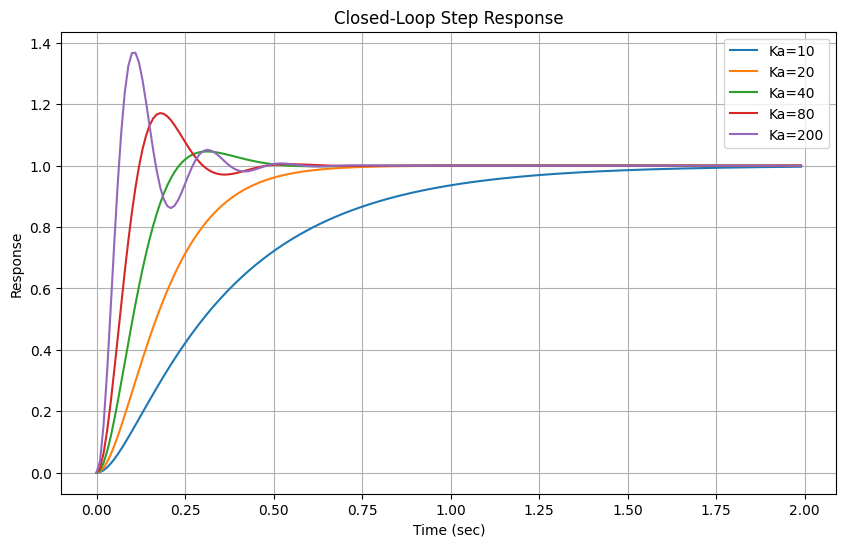

In [5]:
closed_loop_step_response([10, 20, 40, 80, 200])

In [6]:
def disturbance_step_response(Ka):
    sysf = ct.tf([5000], [1, 1000])
    sysg = ct.tf([1], [1, 20, 0])
    t = np.arange(0, 2, 0.01)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Disturbance Step Response')
    plt.xlabel('Time (sec)')
    plt.ylabel('Response')
    plt.grid(True)
    
    for i in Ka:
        sys = ct.feedback(sysg, i*sysf) * -1
        _, y = ct.step_response(sys, t)
        plt.plot(t, y, label=f'Ka={i}')
        
    plt.legend()
    plt.show()

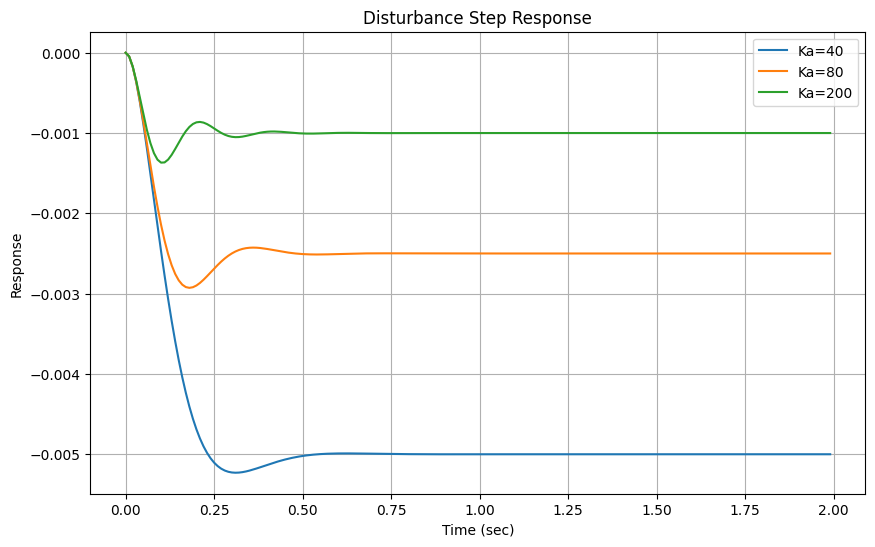

In [7]:
disturbance_step_response([40, 80, 200])